# SYED MUHAMMAD ZAIN ASSIGNMENT 3 DEEP LEARNING
# Reg No: 329876 SECTION:MSEE Signal Processing NUST 2k20
# SGD SIGMOID

In [1]:
from PIL import Image
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,Resize,Normalize
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
transforms1=transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(20),
                                     transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

In [4]:
train_data=ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/TRAINING_DATA',
                       transform=transforms1)
test_data=ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/TEST_DATA',transform=transforms1)

In [5]:
#checking the data throughly
print(len(train_data))
print(len(test_data))
print(type(train_data))
print(type(test_data))
print(train_data.classes)
print(test_data.classes)
print(train_data.class_to_idx)
print(test_data.class_to_idx)

360
90
<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torchvision.datasets.folder.ImageFolder'>
['PEPPER', 'POTATO', 'TOMATO']
['PEPPER', 'POTATO', 'TOMATO']
{'PEPPER': 0, 'POTATO': 1, 'TOMATO': 2}
{'PEPPER': 0, 'POTATO': 1, 'TOMATO': 2}


In [6]:
train_data[0][0].shape# the shape has been changed from 3,256,256 to 3,224,224 #pytorch does channels first

torch.Size([3, 224, 224])

In [7]:
print(train_data[0][0])#provides training data first value
print(train_data[0][1])# provides first label

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])
0


In [8]:
# data loader
dataLoadTrain=DataLoader(train_data,batch_size=32,shuffle=True,num_workers=2)
dataloadTest=DataLoader(test_data,batch_size=32,shuffle=True,num_workers=1)

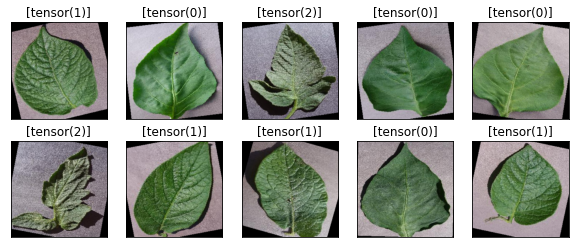

In [9]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
# obtain one batch of training images
data_iter = iter(dataLoadTrain)
images, lbls = data_iter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(10, 4))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    label = lbls[idx]
    #ax.set_title(classes[label])
    ax.set_title([lbls[idx]])

In [10]:
#Creating CNN classifier
train_on_gpu = torch.cuda.is_available() #check if Cuda is available for training
#Initializing Parameters
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer1
        self.conv1 = nn.Conv2d(3, 16, 5)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # convolutional layer2
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.dropout = nn.Dropout(0.2)
        # Fully connected layer1
        self.fc1 = nn.Linear(32*53*53, 256)
        # fully connected layer2
        self.fc2 = nn.Linear(256, 84)
        # fully connected layer3
        self.fc3 = nn.Linear(84, 3)
        # Applying sigmoid function
        self.Sigmoid = nn.Sigmoid() 
    
  
        # feed forward network 
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 32 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.Sigmoid(self.fc3(x))
        return x  
   
     
# create Model instance
model = Net()
print(model)
 
# move tensors to GPU if CUDA is available
if(train_on_gpu):
    model.cuda()
    print("CUDA available")


Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=89888, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=3, bias=True)
  (Sigmoid): Sigmoid()
)


In [11]:
# specify loss function
criterion = torch.nn.CrossEntropyLoss()
# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001,momentum=0.9)

In [12]:
#Train Model
# number of epochs to train the model
n_epochs = 20 # you may increase this number to train a final model
 
#valid_loss_min = np.Inf # track change in validation loss
 
for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    #valid_loss = 0.0
     
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in dataLoadTrain:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
    # calculate average losses
    train_loss = train_loss/len(dataLoadTrain.dataset)
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, train_loss))

Epoch: 1 	Training Loss: 1.098797
Epoch: 2 	Training Loss: 1.098273
Epoch: 3 	Training Loss: 1.097791
Epoch: 4 	Training Loss: 1.097275
Epoch: 5 	Training Loss: 1.096579
Epoch: 6 	Training Loss: 1.095909
Epoch: 7 	Training Loss: 1.095101
Epoch: 8 	Training Loss: 1.094109
Epoch: 9 	Training Loss: 1.092594
Epoch: 10 	Training Loss: 1.091224
Epoch: 11 	Training Loss: 1.088939
Epoch: 12 	Training Loss: 1.087172
Epoch: 13 	Training Loss: 1.084169
Epoch: 14 	Training Loss: 1.081666
Epoch: 15 	Training Loss: 1.077703
Epoch: 16 	Training Loss: 1.073354
Epoch: 17 	Training Loss: 1.067932
Epoch: 18 	Training Loss: 1.060544
Epoch: 19 	Training Loss: 1.051878
Epoch: 20 	Training Loss: 1.043732


In [13]:
batch_size=32

In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [15]:
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloadTest:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 63.333333333333336 %


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/model.pth')

In [ ]:
checkpoint=torch.load('/content/drive/MyDrive/Colab Notebooks/model.pth')